# Digital Imaging Systems Project 01

# Q1

# Q1 a)

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

In [4]:
image = cv2.imread("lena.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image.shape

(440, 440)

In [5]:
image_wolves = cv2.imread("wolves.png")

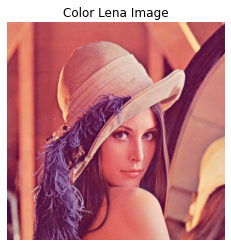

In [6]:
image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image1)
plt.title('Color Lena Image')
plt.axis('off')
plt.show()

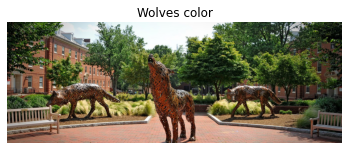

In [7]:
image_wolves = cv2.cvtColor(image_wolves, cv2.COLOR_BGR2RGB)
plt.imshow(image_wolves)
plt.title('Wolves color')
plt.axis('off')
plt.show()

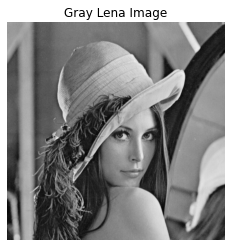

In [8]:
plt.imshow(gray_image, cmap = "gray")
plt.title('Gray Lena Image')
plt.axis('off')
plt.show()

# Padding function

In [9]:
#pad is value of padding and is initialized to zero
#kernel_rows
#kernel_cols

def padding(input_image, pad = 0, kernel_rows = 0, kernel_cols = 0):
    
    #pad = 0 for zero padding
    #pad = 1 for wrap around
    #pad = 2 for copy edge
    #pad = 3 for reflect across edge
    
    input_dims = (input_image.shape[0], input_image.shape[1])
    
    #individual padding values for rows
    top_row_pad_value = int(np.ceil((kernel_rows-1)/2))
    bottom_row_pad_value = int(np.floor((kernel_rows-1)/2))
    
    #individual padding values for cols
    left_col_pad_value = int(np.ceil((kernel_cols-1)/2))
    right_col_pad_value = int(np.floor((kernel_cols-1)/2))
    
    if pad == 0:
        #zero padding
        padded_dims = (input_image.shape[0] + top_row_pad_value + bottom_row_pad_value, 
                       input_image.shape[1] + left_col_pad_value + right_col_pad_value)
        
        padded_image = np.zeros(padded_dims)
        
        #inserting the original image to the zeros image
        padded_image[top_row_pad_value : top_row_pad_value + input_image.shape[0], 
                     left_col_pad_value : left_col_pad_value + input_image.shape[1]] = input_image
        
    if pad == 1:
        
        #wrap around
        padded_dims = (input_image.shape[0] + top_row_pad_value + bottom_row_pad_value, 
                       input_image.shape[1] + left_col_pad_value + right_col_pad_value)
        
        padded_image = np.zeros(padded_dims)
        
        #inserting the original image to the zeros image
        padded_image[top_row_pad_value : top_row_pad_value + input_image.shape[0], 
                     left_col_pad_value : left_col_pad_value + input_image.shape[1]] = input_image
        
        
        #upper most row padding
        if top_row_pad_value != 0:
            padded_image[0 : top_row_pad_value, : ] = padded_image[-1*(top_row_pad_value+bottom_row_pad_value) : top_row_pad_value + input_image.shape[0], : ]
        #lowest row padding
        if bottom_row_pad_value != 0:
            padded_image[-1*(bottom_row_pad_value) : , : ] = padded_image[top_row_pad_value : top_row_pad_value + bottom_row_pad_value, :]
        #right most column padding
        if right_col_pad_value != 0:
            padded_image[ : ,-1*(right_col_pad_value) : ] = padded_image[ : ,left_col_pad_value : left_col_pad_value + right_col_pad_value]
        #left most column padding
        if left_col_pad_value != 0:
            padded_image[ : ,0 : left_col_pad_value] = padded_image[ : ,-1*(left_col_pad_value+right_col_pad_value) : left_col_pad_value + input_image.shape[1]]
    
    if pad == 2:
        
        #copy edge
        padded_dims = (input_image.shape[0] + top_row_pad_value + bottom_row_pad_value, 
                       input_image.shape[1] + left_col_pad_value + right_col_pad_value)
        
        #print(padded_dims)
        padded_image = np.zeros(padded_dims)#.astype(int)
        #print("Dimensions of the padded image:", padded_image.shape)
        
        #inserting the original image to the zeros image
        padded_image[top_row_pad_value : top_row_pad_value + input_image.shape[0], 
                     left_col_pad_value : left_col_pad_value + input_image.shape[1]] = input_image
        
        
        #upper most row padding
        if top_row_pad_value != 0:
            padded_image[0 : top_row_pad_value, : ] = padded_image[[top_row_pad_value], : ]
        #lowest row padding
        if bottom_row_pad_value != 0:
            padded_image[-1*(bottom_row_pad_value) : , : ] = padded_image[[-1*bottom_row_pad_value-1], :]
        #right most column padding
        if right_col_pad_value != 0:
            padded_image[ : ,-1*(right_col_pad_value) : ] = padded_image[ : ,[-1*(right_col_pad_value)-1]]
        #left most column padding
        if left_col_pad_value != 0:
            padded_image[ : ,0 : left_col_pad_value] = padded_image[ : ,[left_col_pad_value]]
            
    if pad == 3:

        #reflect across edge
        padded_dims = (input_image.shape[0] + top_row_pad_value + bottom_row_pad_value, 
                       input_image.shape[1] + left_col_pad_value + right_col_pad_value)

        #print(padded_dims)
        padded_image = np.zeros(padded_dims)#.astype(int)
        #print("Dimensions of the padded image:", padded_image.shape)

        #inserting the original image to the zeros image
        padded_image[top_row_pad_value : top_row_pad_value + input_image.shape[0], 
                     left_col_pad_value : left_col_pad_value + input_image.shape[1]] = input_image


        #upper most row padding
        if top_row_pad_value != 0:
            padded_image[0 : top_row_pad_value, : ] = np.flip(padded_image[top_row_pad_value : 2*top_row_pad_value, :],axis = 0)
        #lowest row padding
        if bottom_row_pad_value != 0:
            padded_image[-1*(bottom_row_pad_value) : , : ] = np.flip(padded_image[-2*(bottom_row_pad_value) : -1*(bottom_row_pad_value), : ], axis = 0)
        #right most column padding
        if right_col_pad_value != 0:
            padded_image[ : ,-1*(right_col_pad_value) : ] = np.flip(padded_image[ : ,-2*(right_col_pad_value) : -1*(right_col_pad_value)], axis = 1)
        #left most column padding
        if left_col_pad_value != 0:
            padded_image[ : ,0 : left_col_pad_value] = np.flip(padded_image[ : ,left_col_pad_value : 2* left_col_pad_value], axis = 1)

    return padded_image

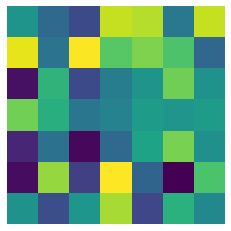

In [10]:
#random image to visualize padding
test_image_1 = np.random.randint(0,255,(7,7), dtype = np.uint8)
plt.imshow(test_image_1)
plt.axis('off')
plt.show()

# Zero Padding

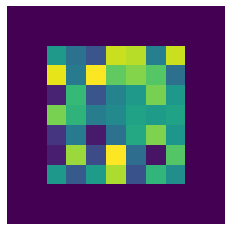

True

In [11]:
Image = padding(test_image_1, 0, 5, 5)
plt.imshow(Image)
plt.axis('off')
plt.show()
cv2.imwrite('zero_padding.png', Image)

# Wrap around Padding

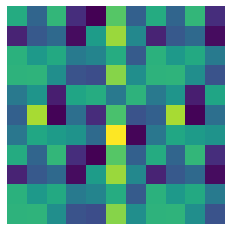

True

In [11]:
Image = padding(test_image_1, 1, 5, 5)
plt.imshow(Image)
plt.axis('off')
plt.show()
cv2.imwrite('wrap_around_padding.png', Image)

# Copy Edge Padding

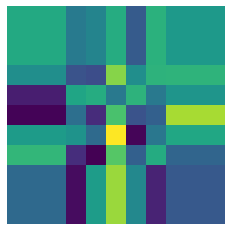

True

In [12]:
Image = padding(test_image_1, 2, 5, 5)
plt.imshow(Image)
plt.axis('off')
plt.show()
cv2.imwrite('copy_edge_padding.png', Image)

# Reflect Edge Padding

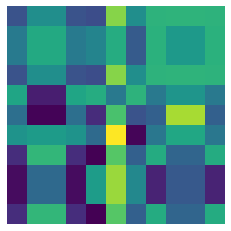

True

In [13]:
#reflect edge padding
Image = padding(test_image_1, 3, 5, 5)
plt.imshow(Image)
plt.axis('off')
plt.show()
cv2.imwrite('reflect_edge_padding.png', Image)

# Function that multiplies the sub-image of the image(f) with the kernel

In [12]:
def convolution(f,w):
    
    return np.sum(f*w)

# Conv2 Function

In [13]:
def conv2(f,w,pad = 0):
    
    if len(f.shape)< 3:
        
        image_padded = padding(f, pad, w.shape[0], w.shape[1])
        
        conv_image = np.zeros((f.shape[0], f.shape[1]))
        
        for row in range(conv_image.shape[0]):
            
            for col in range(conv_image.shape[1]):
                
                conv_image[row][col] = convolution(image_padded[row:row+w.shape[0],col:col+w.shape[1]],w)
                
        return conv_image
                
        
    elif len(f.shape) == 3:
        
        b,g,r = cv2.split(f)
        
        image_padded_b = padding(b, pad, w.shape[0], w.shape[1]) 
        image_padded_g = padding(g, pad, w.shape[0], w.shape[1]) 
        image_padded_r = padding(r, pad, w.shape[0], w.shape[1])
        
        conv_image_b = np.zeros((b.shape[0],b.shape[1]))
        conv_image_g = np.zeros((g.shape[0],g.shape[1]))
        conv_image_r = np.zeros((r.shape[0],r.shape[1]))
        
        for row in range(conv_image_b.shape[0]):
            
            for col in range(conv_image_b.shape[1]):
                
                conv_image_b[row][col] = convolution(image_padded_b[row:row + w.shape[0], col:col + w.shape[1]],w)
                conv_image_g[row][col] = convolution(image_padded_g[row:row + w.shape[0], col:col + w.shape[1]],w)
                conv_image_r[row][col] = convolution(image_padded_r[row:row + w.shape[0], col:col + w.shape[1]],w)
                
        conv_image = cv2.merge((conv_image_b, conv_image_g, conv_image_r)).astype(np.uint8)
        
        
        return conv_image

# Testing on a simple image

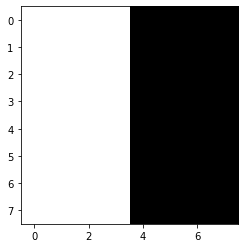

In [17]:
edge_image = np.array([[1,1,1,1,0,0,0,0],[1,1,1,1,0,0,0,0],
                     [1,1,1,1,0,0,0,0],[1,1,1,1,0,0,0,0],
                     [1,1,1,1,0,0,0,0],[1,1,1,1,0,0,0,0],
                     [1,1,1,1,0,0,0,0],[1,1,1,1,0,0,0,0]], dtype = np.uint8)

plt.imshow(edge_image, cmap = 'gray')
plt.show()

(array([32.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

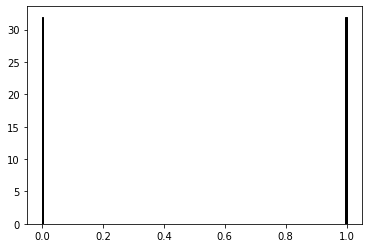

In [21]:
plt.hist(edge_image.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

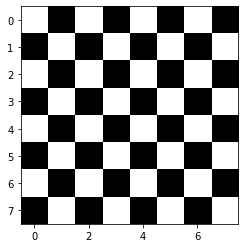

In [20]:
checks_image = np.array([[1,0,1,0,1,0,1,0],[0,1,0,1,0,1,0,1],
                        [1,0,1,0,1,0,1,0],[0,1,0,1,0,1,0,1],
                        [1,0,1,0,1,0,1,0],[0,1,0,1,0,1,0,1],
                        [1,0,1,0,1,0,1,0],[0,1,0,1,0,1,0,1]],dtype = np.uint8)

plt.imshow(checks_image, cmap = 'gray')
plt.show()

(array([32.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

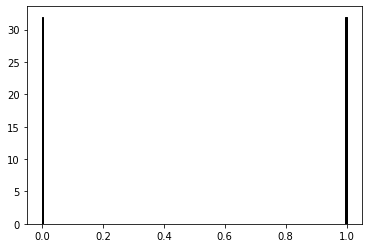

In [22]:
plt.hist(checks_image.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

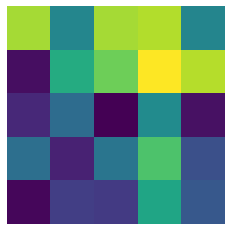

True

In [14]:
test_image_1 = np.random.randint(0,255,(5,5), dtype = np.uint8)
plt.imshow(test_image_1)
plt.axis('off')
plt.show()
cv2.imwrite('simple_test_image.png', test_image_1)

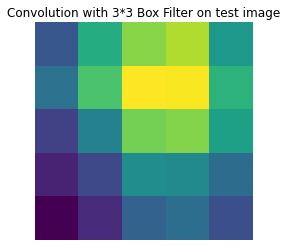

True

In [19]:
# box filter on color image
w = 1/9*np.ones((3,3))
g = conv2(test_image_1,w,0)
plt.imshow(g)
plt.title('Convolution with 3*3 Box Filter on test image')
plt.axis('off')
plt.show()
cv2.imwrite('box_filter_on_simple_test_image.png', g)

# Box Filter on the lena image

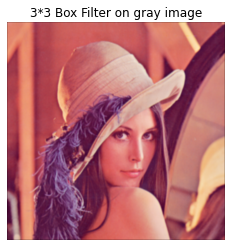

True

In [20]:
# box filter on color image
w = 1/9*np.ones((3,3))
g = conv2(image1,w,0)
plt.imshow(g)
plt.title('3*3 Box Filter on gray image')
plt.axis('off')
plt.show()
cv2.imwrite('box_filter_on_lena_image.png', g)

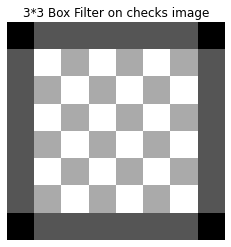

In [24]:
w = 1/9*np.ones((3,3))
g = conv2(checks_image,w,0)
plt.imshow(g, cmap = 'gray')
plt.title('3*3 Box Filter on checks image')
plt.axis('off')
plt.show()
#cv2.imwrite('box_filter_on_lena_image.png', g)

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0., 24.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 18.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 18.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

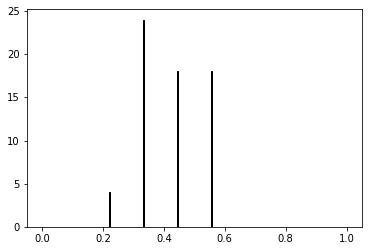

In [25]:
plt.hist(g.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

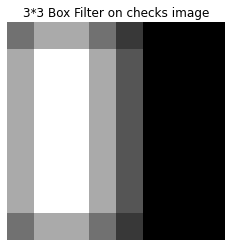

In [26]:
w = 1/9*np.ones((3,3))
g = conv2(edge_image,w,0)
plt.imshow(g, cmap = 'gray')
plt.title('3*3 Box Filter on checks image')
plt.axis('off')
plt.show()

(array([24.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., 16.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

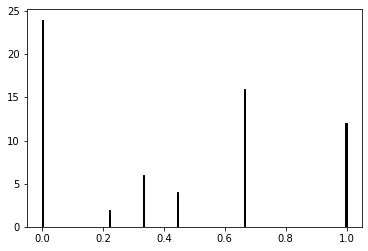

In [27]:
plt.hist(g.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

# Box Filter on wolves image

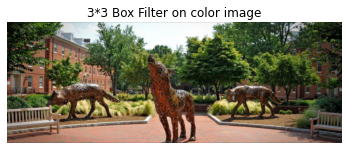

True

In [21]:
w = 1/9*np.ones((3,3))
g = conv2(image_wolves,w,0)
plt.imshow(g)
plt.title('3*3 Box Filter on color image')
plt.axis('off')
plt.show()
cv2.imwrite('box_filter_on_wolves_image.png', g)

# First Order Derivative Filter

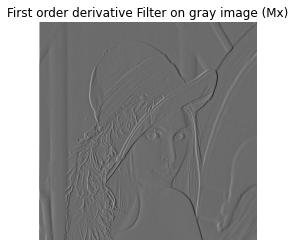

True

In [23]:
w = np.array([[-1,1]])
g = conv2(gray_image,w,0)
plt.imshow(g, cmap = 'gray')
plt.title('First order derivative Filter on gray image (Mx)')
plt.axis('off')
plt.show()
cv2.imwrite('first_order_derivative_filter(Mx)_on_lena_gray_image.png', g)

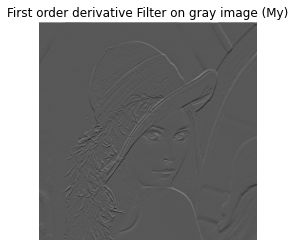

True

In [24]:
w = np.array([[-1], [1]])
g = conv2(gray_image,w,0)
plt.imshow(g, cmap = 'gray')
plt.title('First order derivative Filter on gray image (My)')
plt.axis('off')
plt.show()
cv2.imwrite('first_order_derivative_filter(My)_on_lena_gray_image.png', g)

# Prewitt Filter

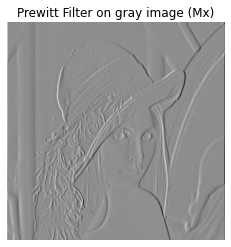

True

In [27]:
#prewitt filter on gray image
w = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
g = conv2(gray_image,w,0)
plt.imshow(g, cmap = 'gray')
plt.title('Prewitt Filter on gray image (Mx)')
plt.axis('off')
plt.show()
cv2.imwrite('Prewitt_filter(Mx)_on_lena_gray_image.png', g)

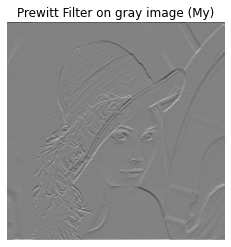

True

In [28]:
w = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
g = conv2(gray_image,w,0)
plt.imshow(g, cmap = 'gray')
plt.title('Prewitt Filter on gray image (My)')
plt.axis('off')
plt.show()
cv2.imwrite('Prewitt_filter(My)_on_lena_gray_image.png', g)

# Roberts Filter

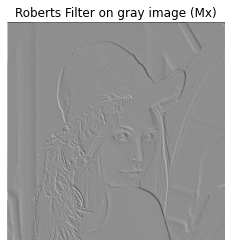

True

In [29]:
w = np.array([[0,1],[-1,0]])
g = conv2(gray_image,w,0)
plt.imshow(g, cmap = 'gray')
plt.title('Roberts Filter on gray image (Mx)')
plt.axis('off')
plt.show()
cv2.imwrite('Roberts_filter(Mx)_on_lena_gray_image.png', g)

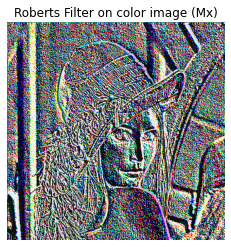

True

In [30]:
w = np.array([[0,1],[-1,0]])
g = conv2(image1,w,0)
plt.imshow(g)
plt.title('Roberts Filter on color image (Mx)')
plt.axis('off')
plt.show()
cv2.imwrite('Prewitt_filter(Mx)_on_lena_image.png', g)

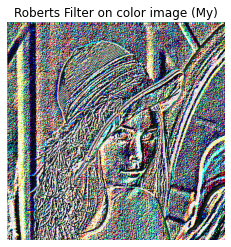

True

In [31]:
w = np.array([[1,0],[0,-1]])
g = conv2(image1,w,0)
plt.imshow(g)
plt.title('Roberts Filter on color image (My)')
plt.axis('off')
plt.show()
cv2.imwrite('Prewitt_filter(My)_on_lena_image.png', g)

# Sobel Filter

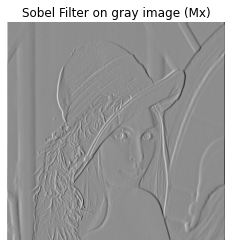

True

In [32]:
w = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
g = conv2(gray_image,w,0)
plt.imshow(g, cmap = 'gray')
plt.title('Sobel Filter on gray image (Mx)')
plt.axis('off')
plt.show()
cv2.imwrite('Prewitt_filter(Mx)_on_lena_gray_image.png', g)

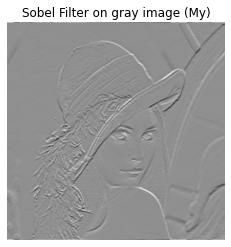

True

In [33]:
w = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
g = conv2(gray_image,w,1)
plt.imshow(g, cmap = 'gray')
plt.title('Sobel Filter on gray image (My)')
plt.axis('off')
plt.show()
cv2.imwrite('Prewitt_filter(My)_on_lena_image.png', g)

# Q.1 b) 

# Visualizing the slice of the impulse image

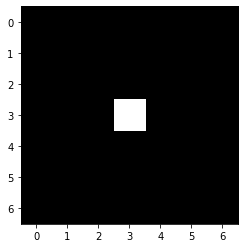

In [28]:
impulse_image = np.zeros((1024,1024))
impulse_image[512,512] = 1
plt.imshow(impulse_image[509:516,509:516], cmap = 'gray')
plt.show()

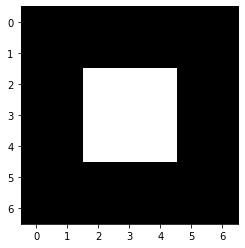

In [29]:
kernel = 1/9*np.ones((3,3))
impulse_conv = conv2(impulse_image, kernel,0)
impulse_conv[509:516,509:516]
plt.imshow(impulse_conv[509:516,509:516], cmap = 'gray')
plt.show()

In [30]:
print(impulse_conv[510:515,510:515])

[[0.         0.         0.         0.         0.        ]
 [0.         0.11111111 0.11111111 0.11111111 0.        ]
 [0.         0.11111111 0.11111111 0.11111111 0.        ]
 [0.         0.11111111 0.11111111 0.11111111 0.        ]
 [0.         0.         0.         0.         0.        ]]


# Answer: 
The average filter will average out the neighbouring pixel values and the impulse response location and this shows the convolution being performed. Passing the impulse through any function should give the output of the function at the location of that impulse. Eg. The averaging filter in our case 1/9[[1,1,1],[1,1,1],[1,1,1]] will give 1/9 at the location of the impulse. 